In [1]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt

In [2]:
stations_file = "stations.json.gz"
cities_file = "city_data.csv"
output_file = "output.svg"

In [3]:
stations_df = pd.read_json(stations_file, lines=True)
cities_df = pd.read_csv(cities_file)

In [4]:
#stations_df

In [5]:
stations_df['avg_tmax'] = stations_df['avg_tmax']/10

In [6]:
stations_df

,avg_tmax,elevation,latitude,longitude,observations,station
0,10.201667,691.0,54.4500,-124.2833,300,CA001092970
1,13.930937,967.0,50.0333,-113.2167,320,CA003030529
2,12.355311,902.0,49.0000,-108.3833,273,CA004038116
3,14.597727,16.0,46.5833,-72.2333,220,CA007016840
4,21.910429,190.8,34.5128,-93.0486,326,USC00033466
5,17.921788,1864.5,39.4286,-105.0703,358,USC00057249
6,25.847268,94.8,32.7128,-82.5414,366,USC00094862
7,15.010929,722.7,48.3511,-116.8353,366,USC00107386
8,14.479508,1501.1,43.8867,-111.7367,366,USC00108818
9,9.858356,185.9,47.2386,-68.6136,365,USC00172878


In [7]:
#cities_df

In [8]:
cities_df = cities_df[np.isfinite(cities_df['population'])]
cities_df = cities_df[np.isfinite(cities_df['area'])]
cities_df = cities_df.reset_index(drop=True)

In [9]:
#cities_df

In [10]:
cities_df['area'] = cities_df['area']*0.000001

In [11]:
cities_df['density'] = cities_df['population']/cities_df['area']

In [12]:
cities_df = cities_df[cities_df['area'] < 10000].reset_index(drop=True)

In [13]:
cities_df

,name,population,area,latitude,longitude,density
0,Calgary,1096833.0,825.290000,51.054444,-114.066944,1329.027372
1,Edmonton,812201.0,684.370000,53.500000,-113.500000,1186.786387
2,Abbotsford,133497.0,375.550000,49.054611,-122.328000,355.470643
3,Burnaby,223218.0,90.610000,49.250000,-122.949167,2463.502925
4,Nanaimo,83811.0,91.000000,49.164167,-123.936389,921.000000
5,Revelstoke,7139.0,40.000000,50.998100,-118.196000,178.475000
6,Richmond,198309.0,129.270000,49.166667,-123.133333,1534.068229
7,Surrey,468251.0,316.410000,49.183300,-122.850000,1479.886856
8,Vancouver,603502.0,115.000000,49.250000,-123.100000,5247.843478
9,Victoria,80032.0,19.470000,48.422151,-123.365700,4110.529019


In [14]:
def distance(city, stations):
    lat1 = city['latitude']
    lon1 = city['longitude']
    lat2 = stations['latitude']
    lon2 = stations['longitude']
    a = np.sin((np.deg2rad(lat2-lat1))/2)*np.sin((np.deg2rad(lat2-lat1))/2)
    b = np.cos(np.deg2rad(lat1))*np.cos(np.deg2rad(lat2))
    c = np.sin((np.deg2rad(lon2-lon1))/2)*np.sin((np.deg2rad(lon2-lon1))/2)
    return 12742*np.arcsin(np.sqrt(a+b*c))

In [15]:
def best_tmax(city, stations):
    stations['temp distance'] = distance(city, stations)
    loc_tmax = stations['temp distance'].idxmin(axis=1)
    
    return stations.loc[loc_tmax, 'avg_tmax']
        

In [16]:
cities_df['avg_tmax'] = cities_df.apply(best_tmax,axis=1, stations = stations_df)

In [17]:
cities_df['population'].min()

313.0

In [18]:
cities_df['population'].idxmin(axis=1)

26

In [19]:
cities_df.loc[26, 'population']

313.0

In [20]:
cities_df

,name,population,area,latitude,longitude,density,avg_tmax
0,Calgary,1096833.0,825.290000,51.054444,-114.066944,1329.027372,12.152329
1,Edmonton,812201.0,684.370000,53.500000,-113.500000,1186.786387,11.098338
2,Abbotsford,133497.0,375.550000,49.054611,-122.328000,355.470643,15.782787
3,Burnaby,223218.0,90.610000,49.250000,-122.949167,2463.502925,13.876667
4,Nanaimo,83811.0,91.000000,49.164167,-123.936389,921.000000,13.864754
5,Revelstoke,7139.0,40.000000,50.998100,-118.196000,178.475000,13.483978
6,Richmond,198309.0,129.270000,49.166667,-123.133333,1534.068229,16.176136
7,Surrey,468251.0,316.410000,49.183300,-122.850000,1479.886856,13.439610
8,Vancouver,603502.0,115.000000,49.250000,-123.100000,5247.843478,15.153846
9,Victoria,80032.0,19.470000,48.422151,-123.365700,4110.529019,15.129146


Text(0, 0.5, 'Population Density (people/km²)')

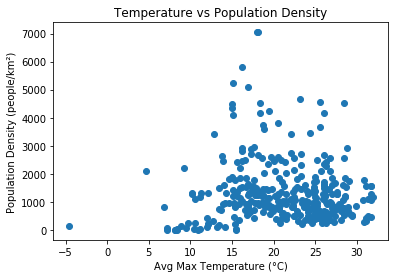

In [21]:
plt.scatter(cities_df['avg_tmax'], cities_df['density'])
plt.title('Temperature vs Population Density')
plt.xlabel('Avg Max Temperature (\u00b0C)')
plt.ylabel('Population Density (people/km\u00b2)')